# TITANIC DATASET

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

# DATA PREPROCESSING

In [336]:
#Linear Algebra
import numpy as np

#Data Processing
import pandas as pd

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algorithm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings
filterwarnings("ignore")


## Getting the Data

In [337]:
train_df = pd.read_csv('csv/train_titanic.csv')
test_df = pd.read_csv('csv/test_titanic.csv')

In [338]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [339]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [340]:
print("Train data Contain: " + str(len(train_df)) + " rows and "+ str(len(train_df.columns)) + " columns")
print("Test data Contain: " + str(len(test_df)) + " rows and "+ str(len(test_df.columns)) + " columns")

Train data Contain: 891 rows and 12 columns
Test data Contain: 418 rows and 11 columns


In [341]:
# Dataframe Overview
print(train_df.info())
print()
      
# Data Description (Numerical Data)      
print(train_df.describe().T)
print()
      
# Data Description (Categorial Data)
print(train_df.describe(include=['O']).T)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
P

In [342]:
# Dataframe Overview
print(test_df.info())
print()
      
# Data Description (Numerical Data)      
print(test_df.describe().T)
print()
      
# Data Description (Categorial Data)
print(test_df.describe(include=['O']).T)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

             count         mean         std     min       25%        50%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.2500  1100.5000   
Pclass       418.0     2.265550    0.841838    1.00    1.0000     3.0000   
Age          332.0    30.272590   14.181209    0.17 

- The label is 'Survived'
- Train dataset have 891 rows and 12 columns (columns label 'Survived')
- Test dataset have 418 rows and have 11 columns 
- The All data have 1309 rows and 12 columns
- The dataset includes 5 catgeorical features (Name, Sex, Ticket, Cabin, Embarked)
- The dataset includes 6 numerical features (PassengerId, Pclass, Age, SibSp, Parch, Fare)

# DATA CLEANSING

### Check Missing Value 

In [343]:
print("Missing in the Data Train: ")
display(train_df.isna().sum())
print("Missing in the Data Test: ")
display(test_df.isna().sum())

Missing in the Data Train: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing in the Data Test: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- In the training data we have missing data in columns 'Age', 'Cabin', and 'Embarked'
- In the test data we have missing data in columns 'Age','Fare',and 'Cabin'

##### Age

In [344]:
print("Missing for Age in entire dataset: " + str(all_data['Age'].isna().sum()))
print("Missing in the Percentage: " + str(round(all_data['Age'].isna().sum()/len(all_data)*100.0)) + " %" )

Missing for Age in entire dataset: 263
Missing in the Percentage: 20.0 %


<AxesSubplot:xlabel='Age', ylabel='Density'>

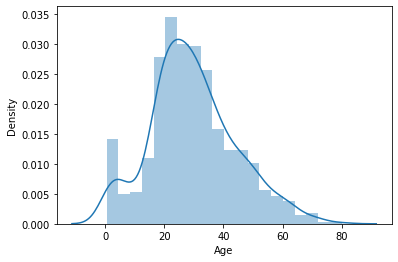

In [345]:
sns.distplot(train_df['Age'])

##### Cabin

In [346]:
print("Missing for Cabin in entire dataset: " + str(train_df['Cabin'].isna().sum()))
print("Missing in the Percentage: " + str(round(train_df['Cabin'].isna().sum()/len(all_data)*100.0)) + " %" )

Missing for Cabin in entire dataset: 687
Missing in the Percentage: 52.0 %


##### Embarked

In [347]:
print("Missing for Embarked in entire dataset: " + str(train_df['Embarked'].isna().sum()))
print("Missing in the Percentage: " + str(round(train_df['Embarked'].isna().sum()/len(all_data)*100.0)) + " %" )

Missing for Embarked in entire dataset: 2
Missing in the Percentage: 0.0 %


##### Fare

In [348]:
print("Missing for Fare in entire dataset: " + str(train_df['Fare'].isna().sum()))
print("Missing in the Percentage: " + str(round(train_df['Fare'].isna().sum()/len(all_data)*100.0)) + " %" )

Missing for Fare in entire dataset: 0
Missing in the Percentage: 0.0 %


## HANDLING MISSING VALUE

In [349]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### Handling Age

In [350]:
median_age_train = median_age_train = train_df['Age'].median()
median_age_test = median_age_test = test_df['Age'].median()

In [351]:
train_df['Age'] = train_df['Age'].fillna(median_age_train)
test_df['Age'] = test_df['Age'].fillna(median_age_test)

##### Handling Embarked

In [352]:
mode_embarked_train = mode_embarked_train = train_df['Embarked'].mode()[0]

In [353]:
train_df['Embarked'] = train_df['Embarked'].fillna(mode_embarked_train)

##### Handling Fare

In [354]:
median_fare_test = median_fare_test = test_df['Fare'].median()

In [355]:
test_df['Fare'] = test_df['Fare'].fillna(median_fare_test)

##### Handling Cabin

In [356]:
train_df.drop(columns={'Cabin'}, inplace=True)
test_df.drop(columns={'Cabin'}, inplace=True)

# EXPLORATORY DATA ANALYSIS

In [357]:
combine =[train_df,test_df]

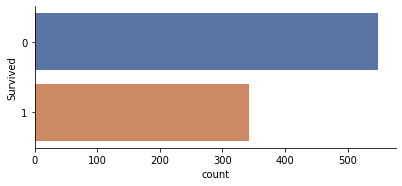

In [358]:
# Plot Survived
sns.catplot(y='Survived', kind='count', data=train_df, height=2.5, aspect=2.2, palette = 'deep')

#### MULTIVARIATE ANALYSIST

<AxesSubplot:title={'center':'Age x Survived'}, xlabel='Age', ylabel='Count'>

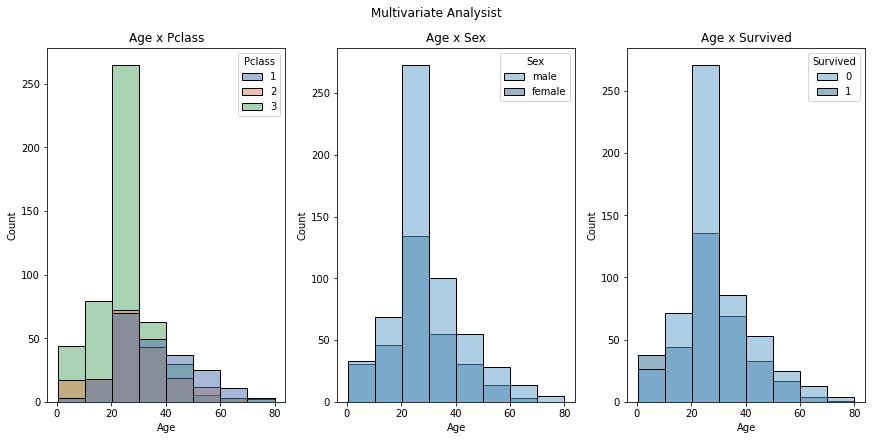

In [359]:
# Distribution Class
fig_dims = (12,6)
fig, axes = plt.subplots(1,3, constrained_layout=True, figsize=fig_dims)

fig.suptitle('Multivariate Analysist')
axes[0].set_title('Age x Pclass')
axes[1].set_title('Age x Sex')
axes[2].set_title('Age x Survived')

sns.histplot(x='Age', hue='Pclass', data=train_df ,bins = 8,  ax = axes[0],palette='deep')
sns.histplot(x='Age', hue='Sex', data=train_df, bins = 8, ax = axes[1], palette = 'Blues_d')
sns.histplot(x='Age', hue='Survived', data=train_df ,bins = 8,  ax = axes[2],palette='Blues_d')

- The Passengers in Pclass 3 are dominated by passengers aged the 30s
- The Male Passengers Mostly Can't Survived tah Female
- The Male Passengers and Female Passengers in the Age 30s is can't survived

<AxesSubplot:title={'center':'Survived x Sex'}, xlabel='Survived', ylabel='Count'>

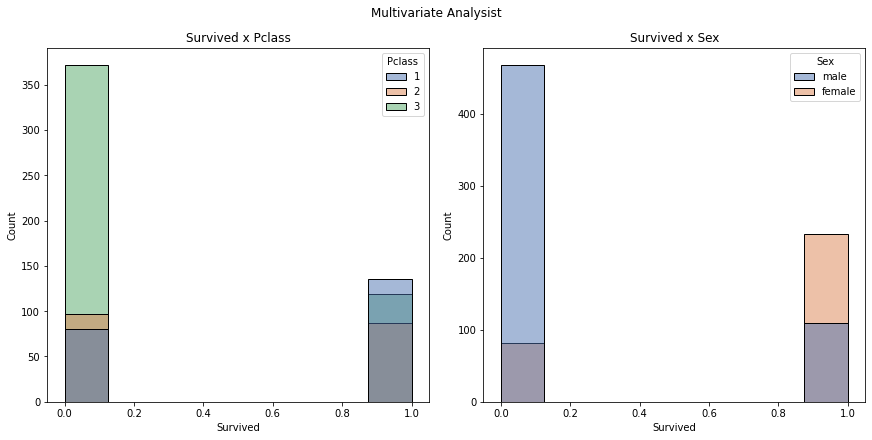

In [360]:
# Distribution Class
fig, axes = plt.subplots(1,2, constrained_layout=True, figsize=fig_dims)

fig.suptitle('Multivariate Analysist')
axes[0].set_title('Survived x Pclass')
axes[1].set_title('Survived x Sex')

sns.histplot(x='Survived', hue='Pclass', data=train_df ,bins = 8,  ax = axes[0],palette='deep')
sns.histplot(x='Survived', hue='Sex', data=train_df ,bins = 8,  ax = axes[1],palette='deep')

- 0 is mean dead and 1 is mean is alive
- as we see many people who can be survived dominated at Pclass 1 and at  Pclass 3 mostly can't survived
- and we can see too if the based of sex female most can survived more than male

In [361]:
female_data = train_df[train_df['Sex']== 'female']
male_data = train_df[train_df['Sex']== 'male']

<AxesSubplot:title={'center':'Age Survived Male'}, xlabel='Age', ylabel='Count'>

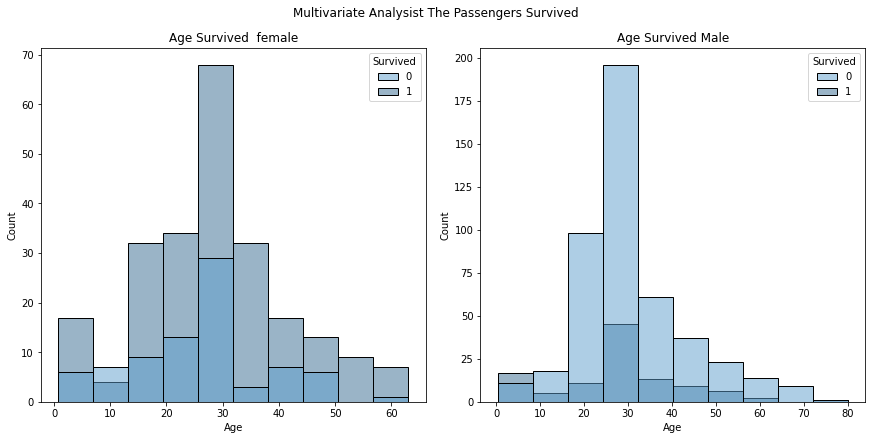

In [362]:
# Distribution Class
fig, axes = plt.subplots(1,2, constrained_layout=True, figsize=fig_dims)

fig.suptitle('Multivariate Analysist The Passengers Survived')
axes[0].set_title('Age Survived  female')
axes[1].set_title('Age Survived Male')

sns.histplot(x='Age', hue='Survived', data=female_data, bins = 10, ax = axes[0],palette='Blues_d')
sns.histplot(x='Age', hue='Survived', data=male_data,  bins = 10, ax = axes[1],palette='Blues_d')

- As we can see in this histplotthe Female passengers who can still alive majority is female with Pclass 1 by age 30s
- The Opposite the Female Passengers the male passengers by age 20 - 30s many can't survived

# DATA PREPROCESSING

In [363]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [364]:
col_del = train_df[['Name','Ticket','SibSp','Parch']]
col_del2 = test_df[['Name','Ticket','SibSp','Parch']]

In [365]:
train_df.drop(columns=(col_del), inplace = True)
test_df.drop(columns=(col_del2), inplace = True)

In [366]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S


### ENCODE

In [367]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 13) & (dataset['Fare'] <= 100),'Fare'] = 2,
    dataset.loc [ dataset['Fare'] >100, 'Fare'] = 3

In [368]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,0.0,S
1,2,1,1,female,38.0,2.0,C


In [369]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [370]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix=['Embarkeds'])
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix=['Embarkeds'])

In [371]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarkeds_C,Embarkeds_Q,Embarkeds_S
0,1,0,3,1,22.0,0.0,0,0,1
1,2,1,1,0,38.0,2.0,1,0,0
2,3,1,3,0,26.0,0.0,0,0,1


### SCALLER

In [372]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train_df['Fare'] = scale.fit_transform(np.array(train_df['Fare']).reshape(-1,1))
test_df['Fare'] = scale.fit_transform(np.array(test_df['Fare']).reshape(-1,1))

### CORRELATION

In [373]:
label = train_df['Survived']

In [374]:
df_corr = train_df.drop(columns=['Survived'])

In [375]:
df_corr['Label'] = label

In [376]:
df_corr.corr()

,PassengerId,Pclass,Sex,Age,Fare,Embarkeds_C,Embarkeds_Q,Embarkeds_S,Label
PassengerId,1.000000,-0.035144,0.042939,0.034212,0.004665,-0.001205,-0.033606,0.022204,-0.005007
Pclass,-0.035144,1.000000,0.131900,-0.339898,-0.693736,-0.243292,0.221009,0.074053,-0.338481
Sex,0.042939,0.131900,1.000000,0.081163,-0.216932,-0.082853,-0.074115,0.119224,-0.543351
Age,0.034212,-0.339898,0.081163,1.000000,0.102097,0.030248,-0.031415,-0.006729,-0.064910
Fare,0.004665,-0.693736,-0.216932,0.102097,1.000000,0.252393,-0.184869,-0.104768,0.292884
Embarkeds_C,-0.001205,-0.243292,-0.082853,0.030248,0.252393,1.000000,-0.148258,-0.782742,0.168240
Embarkeds_Q,-0.033606,0.221009,-0.074115,-0.031415,-0.184869,-0.148258,1.000000,-0.499421,0.003650
Embarkeds_S,0.022204,0.074053,0.119224,-0.006729,-0.104768,-0.782742,-0.499421,1.000000,-0.149683
Label,-0.005007,-0.338481,-0.543351,-0.064910,0.292884,0.168240,0.003650,-0.149683,1.000000


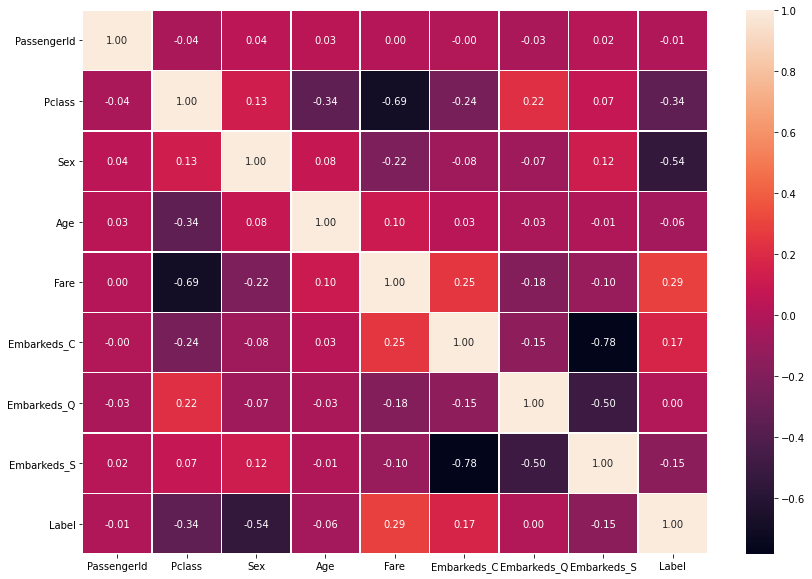

In [377]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr.corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show()

 - 'Sex','Pclass','Fare','Embarked C', 'Embarked S'
 - The columns above who is have the coorelation with "Survived"

## TRAIN TEST 

In [378]:
# train_data = train_df.drop('Survived', axis = 1)
# target = train_df['Survived']
train_df = train_df.drop(['PassengerId'], axis = 1)

In [379]:
train_data = train_df.drop('Survived', axis = 1)
target = train_df['Survived']

train_data.shape 

(891, 7)

In [380]:
target.shape

(891,)

# MODELLING

#### WE USED CLASSIFICATION MODELLING

## Cross Validation (K-Fold)

In [381]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

#### KNN

In [382]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.77777778 0.79775281 0.74157303 0.70786517 0.79775281 0.7752809
 0.75280899 0.79775281 0.74157303 0.75280899]


In [383]:
## KNN SCORE
round(np.mean(score)*100 , 2)

76.43

#### Decision Tree

In [384]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.75555556 0.86516854 0.74157303 0.83146067 0.8988764  0.85393258
 0.7752809  0.7752809  0.7752809  0.83146067]


In [385]:
## DT SCORE
round(np.mean(score)*100 , 2)

81.04

#### Random Forest

In [386]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.77777778 0.85393258 0.74157303 0.83146067 0.86516854 0.83146067
 0.79775281 0.76404494 0.80898876 0.82022472]


In [387]:
## RF SCORE
round(np.mean(score)*100 , 2)

80.92

#### Naive Bayes

In [388]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.77777778 0.78651685 0.69662921 0.68539326 0.69662921 0.7752809
 0.7752809  0.74157303 0.78651685 0.7752809 ]


In [389]:
## Naive Bayes SCORE
round(np.mean(score)*100 , 2)

74.97

#### SVM

In [390]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.58888889 0.6741573  0.68539326 0.60674157 0.68539326 0.66292135
 0.60674157 0.66292135 0.60674157 0.5505618 ]


In [391]:
## SVM SCORE
round(np.mean(score)*100 , 2)

63.3

### Testing

In [411]:
clf = RandomForestClassifier()
clf.fit(train_data, target)

test_data = test_df.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

In [412]:
submission = pd.DataFrame({
    "PassengerId" : test_df['PassengerId'],
    "Survived": prediction
})

submission.to_csv("submission.csv", index = False)

In [413]:
submission = pd.read_csv('submission.csv')
submission.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
